In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from zipfile import ZipFile
from datetime import datetime


In [8]:
 # Read the CSV file into a DataFrame
df = pd.read_excel('Ecommerce.xlsx')
result = df.dtypes
print(result)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


Display the first few rows of the dataset
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
Summary statistics of the dataset
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                       

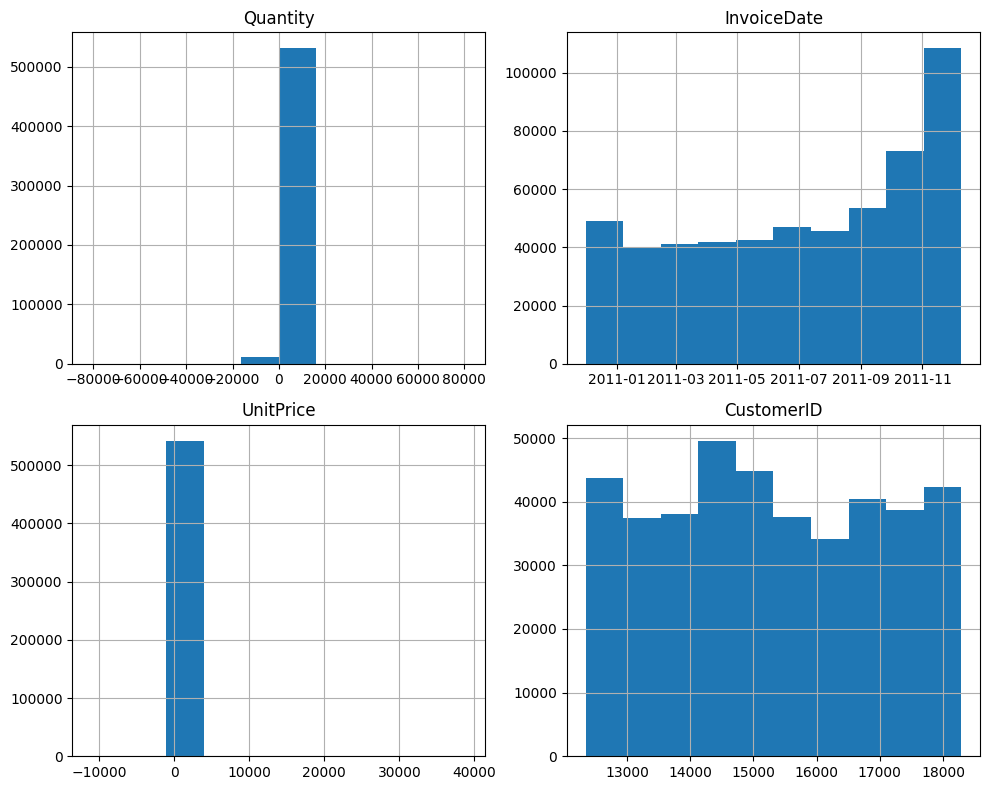

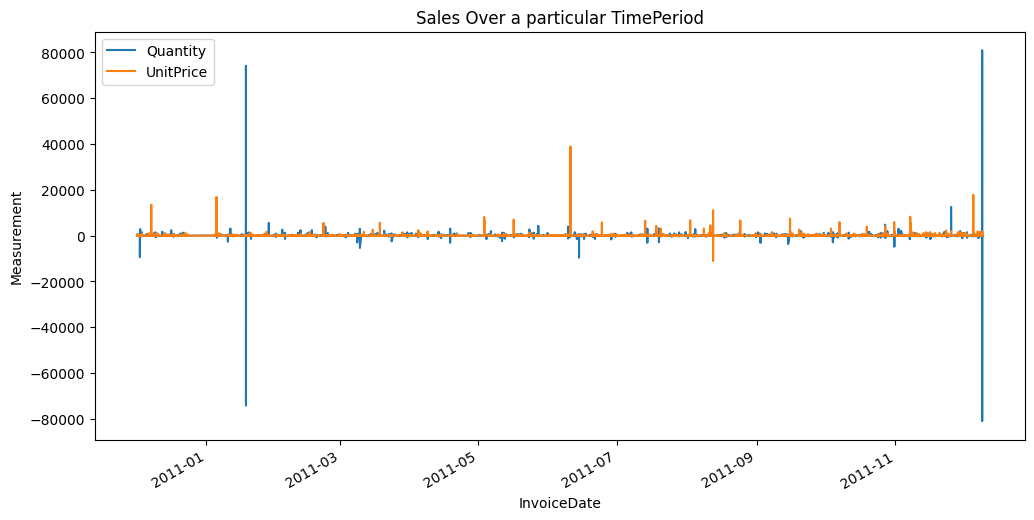

In [10]:
 # Read the CSV file into a DataFrame
df = pd.read_excel('Ecommerce.xlsx')

# Display the first few rows of the dataset
print("Display the first few rows of the dataset")
print(df.head())

# Summary statistics of the dataset
print("Summary statistics of the dataset")
print(df.describe())

# Check for missing values
print("Check for missing values")
print(df.isnull().sum())

# Data visualization - Histogram of each feature
print("Data visualization - Histogram of each feature")
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Data visualization - Correlation heatmap
#print("Data visualization - Correlation heatmap")
#corr_matrix = df.corr()
#sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
#plt.title("Correlation Heatmap")
#plt.show()

# Assess skewness of the data
#print("Assess skewness of the data")
#skewness = df.skew()
#print(skewness)

# Identify potential biases
# You can perform further analysis based on your specific research objectives and the features in the dataset.
# For example, you can comparing the no of items sold(quantity) across a particular date

# Time series analysis - Visualize the quality of change
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.plot(x="InvoiceDate", y=["Quantity", "Country", "UnitPrice"], figsize=(12, 6))
plt.title("Sales Over a particular TimePeriod")
plt.ylabel("Measurement")
plt.show()


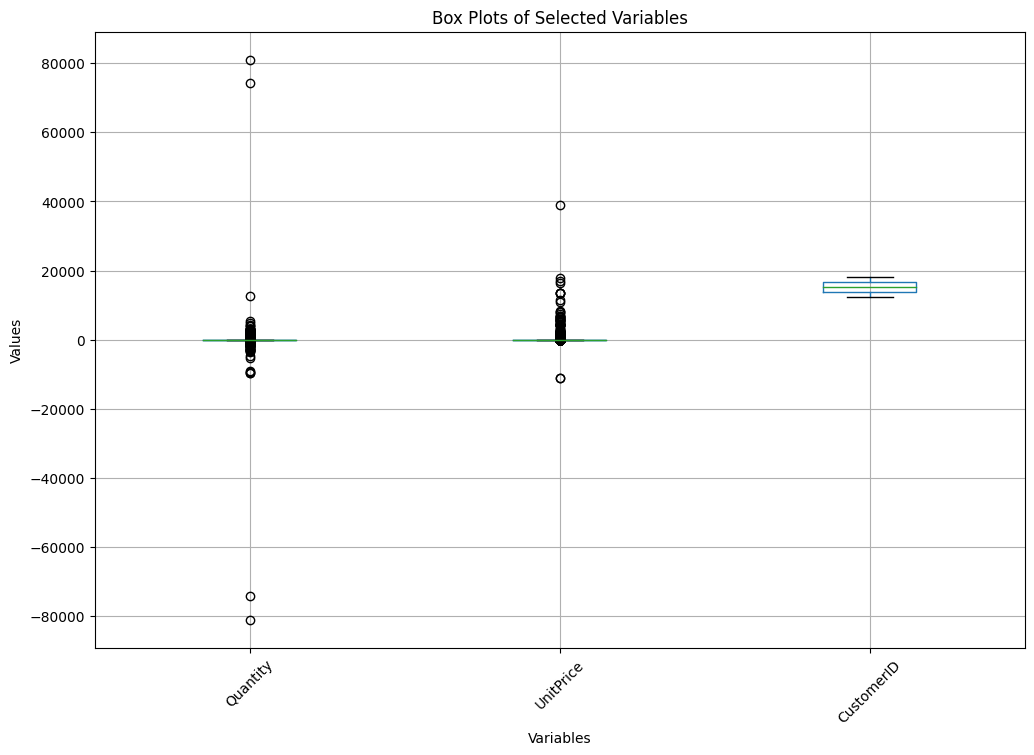

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [12]:
#IDENTIFY DATA OUTLIERS

# Select the columns that may contain outliers
columns_of_interest = ["InvoiceNo","StockCode","Description","Quantity","InvoiceDate","UnitPrice","CustomerID","Country"]                

# Create box plots for each column to visualize outliers
plt.figure(figsize=(12, 8))
df[columns_of_interest].boxplot()
plt.xticks(rotation=45)
plt.title("Box Plots of Selected Variables")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.show()

# Define the threshold for identifying outliers (you can adjust this based on your specific requirements)
outlier_threshold = 3  # Adjust this value as needed

# Iterate over each column and identify the outliers
for column in columns_of_interest:
    # Calculate the z-scores for each data point
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    
    # Identify the outliers based on the z-scores exceeding the threshold
    outliers = df[abs(z_scores) > outlier_threshold][column]
    
    if outliers.empty:
        print(f"No outliers found in column: {column}")
    else:
        print(f"Outliers found in column: {column}")
        print(outliers)
        
    # Count the number of outliers in the column
    num_outliers = len(outliers)
    print(f"Number of outliers in column {column}: {num_outliers}")
    print("\n")

In [14]:
# Select the columns of interest (replace the column names as per your dataset)
columns_of_interest = ["Quantity","UnitPrice","CustomerID"]

# Create a new DataFrame to store the relevancy scores
relevancy_scores = pd.DataFrame(columns=["Column", "RelevancyScore"])

# Iterate over each column and calculate the relevancy score
for column in columns_of_interest:
    # Calculate the z-scores for each data point
    z_scores = (df[column] - df[column].mean()) / df[column].std()

    # Identify the outliers based on the z-scores exceeding the threshold
    outliers = df[abs(z_scores) > outlier_threshold][column]

    # Calculate the relevancy score for the column
    relevancy_score = len(df[column]) - df[column].isnull().sum() - len(outliers)

    # Append the column name and relevancy score to the relevancy_scores DataFrame
    relevancy_scores = relevancy_scores.append({"Column": column, "RelevancyScore": relevancy_score}, ignore_index=True)

# Print the relevancy scores for each column
print("Relevancy Scores:")
print(relevancy_scores)



AttributeError: 'DataFrame' object has no attribute 'append'

Trying Prophet Model

In [15]:
retail_df = pd.read_excel('Ecommerce.xlsx')

In [22]:
# Remove rows with missing values
retail_df = retail_df.dropna()

# Filter rows where Quantity is greater than 0
retail_df = retail_df[retail_df['Quantity'] > 0]

# Create a new column 'price' by multiplying Quantity and UnitPrice
retail_df['price'] = retail_df['Quantity'] * retail_df['UnitPrice']

# Group by InvoiceDate and calculate the sum of prices
DataTS = retail_df.groupby('InvoiceDate').agg({'price': 'sum'}).reset_index()

# Rename the columns
DataTS.columns = ['date', 'TotalOrderPrice']

# Print the structure of the DataFrame
print(DataTS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17286 entries, 0 to 17285
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             17286 non-null  datetime64[ns]
 1   TotalOrderPrice  17286 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 270.2 KB
None


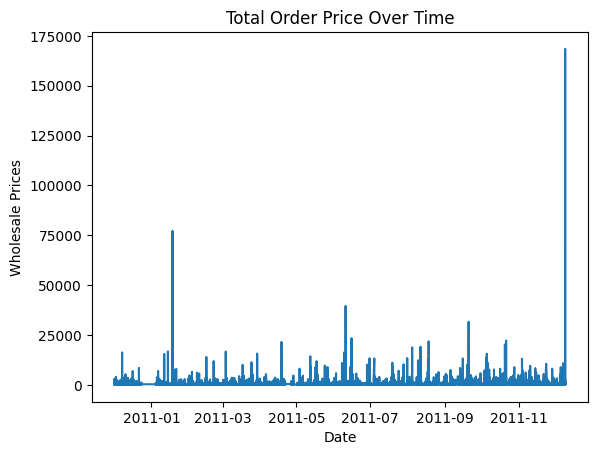

In [23]:
# Convert 'date' column to datetime format
DataTS['Date'] = pd.to_datetime(DataTS['date'], format='%m/%d/%Y')

# Select only 'TotalOrderPrice' and 'Date' columns
DataTS = DataTS[['TotalOrderPrice', 'Date']]

plt.plot(DataTS['Date'], DataTS['TotalOrderPrice'])

# Set plot title, labels, and styling
plt.title("Total Order Price Over Time")
plt.xlabel("Date")
plt.ylabel("Wholesale Prices")
plt.grid(False)

# Display the plot
plt.show()

Fitting the prophet model


In [32]:
import prophet




# Continue with using the Prophet library as needed

/Users/kavya/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
